In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import numpy.linalg as linalg
import scipy.sparse as sparse
import scipy.sparse.linalg as linalgs
from matplotlib import animation
from IPython.display import HTML

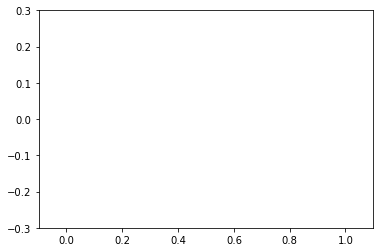

In [75]:
fig, ax = plt.subplots()

ax.set_xlim(( -0.1, 1.1))
ax.set_ylim((- 0.3, 0.3))

line, = ax.plot([], [], lw=2)

nframes = 500

def init():
    line.set_data([], [])
    return (line,)

In [76]:
class RodTherm():
    """Class for setting up a string wave eigenvector problem"""
    def alpha(self, x=None):
        """Return the heat equation constant"""
        return(1.) 
    def length(self, x=None):
        """Return length of rod"""
        return(1.) 
    def __init__(self, N=201, **kwargs):
        self.kwargs = kwargs
        self.N = N
        self.h = 1. / (np.float64(N) + 1.)
        self.x = (np.arange(self.N, dtype=np.float64) + 1.) * self.h
        diagonal = [np.zeros(N)-2, np.zeros(N-1) +1, np.zeros(N-1) +1]  
        self.A = sparse.diags(diagonals= diagonal,
                              offsets=[0, 1, -1], shape=(N, N))
    def eig(self):
        # Note that the sparse version of "eig" failed here; I know this problem should 
        # yield sines and cosines. A lesson to check your package's performance! So I 
        # work on the full matrix.
        vals, vecs = linalg.eig(self.A.toarray())
        isort = np.argsort(vals)
        self.evals = vals[isort]
        self.evecs = vecs[:, isort]
    def set_coeffs(self, a=None, b=None):
        self.a = a
        self.b = b
    def fit_coeffs(self, d=None):
        """Fit coefficients for eigenvectors for a set of displacements"""
        (u, w, vt) = linalg.svd(self.evecs)
        inz = np.where(w > 1.e-15)[0]
        invw = np.zeros(len(w))
        invw[inz] = 1. / w[inz] 
        einv = vt.transpose().dot(np.diag(invw)).dot(u.transpose())
        return(einv.dot(d)) 
    def frame(self, i):
        period =  2. * np.pi / np.sqrt(self.evals[0])
        t = np.float64(i) / np.float64(nframes) * period * 4
        x = self.x
        coeffs = (self.a * np.cos(np.sqrt(self.evals) * t) +
                  self.b * np.sin(np.sqrt(self.evals) * t))
        y = self.evecs.dot(coeffs).flatten()
        line.set_data(x, y)
        return (line,)

In [77]:
#returns the matrix that encodes the solution to the heat equation 

rod = RodTherm()
rod.eig()
print(rod.A.toarray())

[[-2.  1.  0. ...,  0.  0.  0.]
 [ 1. -2.  1. ...,  0.  0.  0.]
 [ 0.  1. -2. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ..., -2.  1.  0.]
 [ 0.  0.  0. ...,  1. -2.  1.]
 [ 0.  0.  0. ...,  0.  1. -2.]]


In [78]:
print(rod.evals[0:30])

[-3.99975813 -3.99903256 -3.99782349 -3.99613119 -3.99395609 -3.9912987
 -3.98815966 -3.98453974 -3.98043982 -3.97586088 -3.97080403 -3.9652705
 -3.95926162 -3.95277884 -3.94582374 -3.938398   -3.93050341 -3.92214188
 -3.91331544 -3.90402622 -3.89427646 -3.88406853 -3.87340489 -3.86228812
 -3.85072092 -3.83870608 -3.8262465  -3.8133452  -3.8000053  -3.78623003]


In [79]:
print(np.sqrt(st.evals[0:30] / st.evals[0]))

[  1.           1.99993953   2.99975813   3.99939533   4.99879069
   5.99788378   6.99661418   7.9949215    8.99274538   9.99002546
  10.98670146  11.9827131   12.97800016  13.97250244  14.96615982
  15.9589122   16.95069957  17.94146193  18.93113939  19.91967209
  20.90700026  21.89306421  22.8778043   23.86116098  24.84307479
  25.82348636  26.80233641  27.77956573  28.75511525  29.72892596]


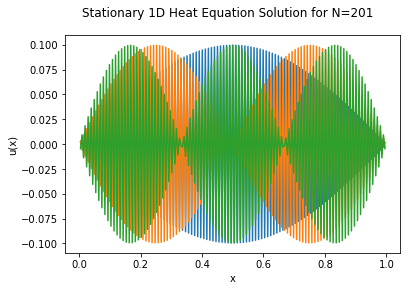

In [80]:
#the heat equation mathes well with the analytical prediction (gaussian-like sine wave-packets)

for i in np.arange(3):
    plt.plot(rod.x, rod.evecs[:, i])
    plt.xlabel('x') 
    plt.ylabel('u(x)')
    plt.suptitle('Stationary 1D Heat Equation Solution for N=201')

In [81]:
#varying N 
class NRodTherm(RodTherm): 
    def __init__(self, N=501, **kwargs):
        self.kwargs = kwargs
        self.N = N
        self.h = 1. / (np.float64(N) + 1.)
        self.x = (np.arange(self.N, dtype=np.float64) + 1.) * self.h
        diagonal = [np.zeros(N)-2, np.zeros(N-1) +1, np.zeros(N-1) +1]  
        self.A = sparse.diags(diagonals= diagonal,
                              offsets=[0, 1, -1], shape=(N, N))

In [82]:
rod2 = NRodTherm()
rod2.eig()
print(rod2.A.toarray())

[[-2.  1.  0. ...,  0.  0.  0.]
 [ 1. -2.  1. ...,  0.  0.  0.]
 [ 0.  1. -2. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ..., -2.  1.  0.]
 [ 0.  0.  0. ...,  1. -2.  1.]
 [ 0.  0.  0. ...,  0.  1. -2.]]


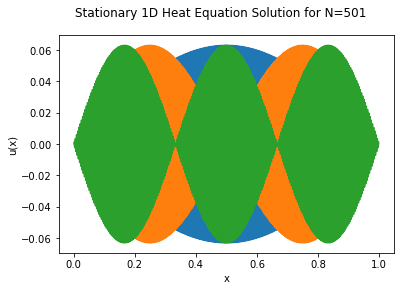

In [83]:
#increasing N makes the eigenfunctions more accurate with respect to the analytical solution 
for i in np.arange(3):
    plt.plot(rod2.x, rod2.evecs[:, i])
    plt.xlabel('x') 
    plt.ylabel('u(x)')
    plt.suptitle('Stationary 1D Heat Equation Solution for N=501')

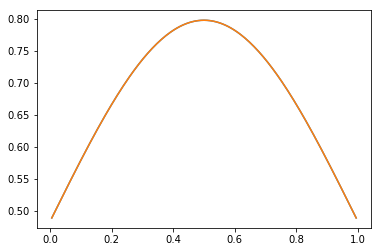

In [84]:
#setting up the Gaussian central temperature excess

initial = mlab.normpdf(rod.x, 1/2., 0.5) 
coeffs = rod.fit_coeffs(d=initial)

plt.plot(rod.x, initial)
plt.plot(rod.x, rod.evecs.dot(coeffs))

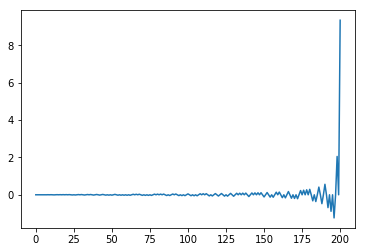

In [85]:
plt.plot(coeffs)

In [88]:
#Time-evolution of the Gaussian 

bcoeffs = np.zeros(len(rod.evals))

rod.set_coeffs(a=coeffs, b=bcoeffs)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, rod.frame, init_func=init,
                               frames=nframes, interval=40, blit=True)

HTML(anim.to_html5_video())

RuntimeError: No MovieWriters available!

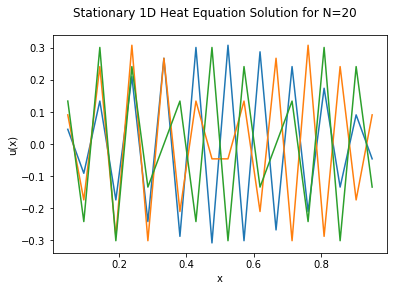

In [70]:
#varying N- decreasing N makes the numerical solution less accurate with respect to the analytical solution 
class N2RodTherm(RodTherm): 
    def __init__(self, N=20, **kwargs):
        self.kwargs = kwargs
        self.N = N
        self.h = 1. / (np.float64(N) + 1.)
        self.x = (np.arange(self.N, dtype=np.float64) + 1.) * self.h
        diagonal = [np.zeros(N)-2, np.zeros(N-1) +1, np.zeros(N-1) +1]  
        self.A = sparse.diags(diagonals= diagonal,
                              offsets=[0, 1, -1], shape=(N, N))
rod3 = N2RodTherm()
rod3.eig()   

for i in np.arange(3):
    plt.plot(rod3.x, rod3.evecs[:, i])
    plt.xlabel('x') 
    plt.ylabel('u(x)')
    plt.suptitle('Stationary 1D Heat Equation Solution for N=20')
    

In [58]:
class BarrierRodTherm(RodTherm):
    def alpha(self, x=None):
        """Return the heat equation constant"""
        
        alpha = np.cos(x)
        return(alpha) 

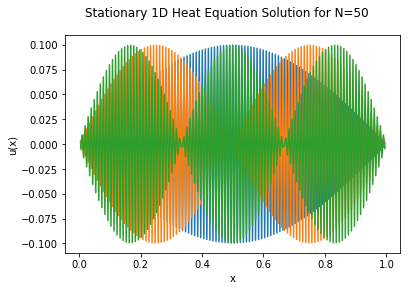

In [59]:
rod4 = BarrierRodTherm()
rod4.eig()   

for i in np.arange(3):
    plt.plot(rod4.x, rod4.evecs[:, i])
    plt.xlabel('x') 
    plt.ylabel('u(x)')
    plt.suptitle('Stationary 1D Heat Equation Solution for N=50')